# Project 2: Implementing a Simple Convolutional Neural Network (CNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Convolutional Neural Network (CNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- CIFAR-10: A dataset of 60,000 32x32 color images in 10 classes with 6,000 images per class.
- MNIST: A dataset of 70,000 28x28 grayscale images of handwritten digits (0-9).
- Fashion-MNIST: A dataset of 70,000 28x28 grayscale images of 10 different clothing caregories.


In [25]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 3s 0us/step


In [26]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.5085 - accuracy: 0.4532 - val_loss: 1.2381 - val_accuracy: 0.5567
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1585 - accuracy: 0.5892 - val_loss: 1.1124 - val_accuracy: 0.6047
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0036 - accuracy: 0.6481 - val_loss: 0.9697 - val_accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9097 - accuracy: 0.6799 - val_loss: 0.9246 - val_accuracy: 0.6812
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8358 - accuracy: 0.7054 - val_loss: 0.9266 - val_accuracy: 0.6785
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7752 - accuracy: 0.7275 - val_loss: 0.9474 - val_accuracy: 0.6788
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7270 - accuracy: 0.7443 - val_loss: 0.9478 - val_accuracy

313/313 - 1s - loss: 0.8897 - accuracy: 0.7099 - 632ms/epoch - 2ms/step
Test accuracy: 0.7099000215530396


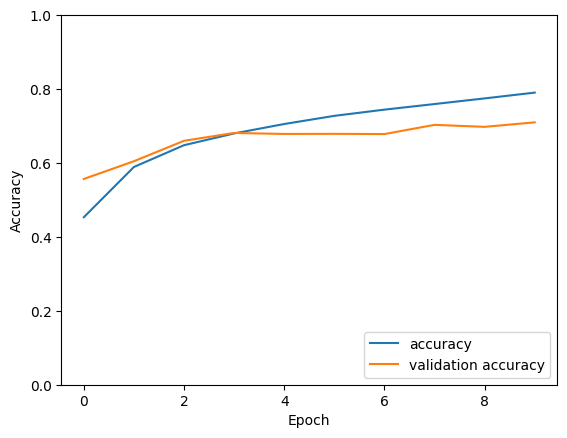

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


---
### Questions
Answer the following questions in detail.

1. What is a Convolutional Neural Network (CNN)? Describe its key components and how they differ from those in a fully connected neural network.
2. Explain the purpose of the convolution operation in a CNN. How does the use of different filter sizes affect the feature maps?
3. What is the purpose of a pooling layer in a CNN, and how does it contribute to the network’s performance?
4. Why are activation functions important in CNNs? Compare the use of ReLU (Rectified Linear Unit) with other activation functions.
5. Describe the process of training a CNN. What are some common challenges faced during training?
6. What are some common evaluation metrics used to assess the performance of a CNN on a classification task?
7. How does data augmentation help improve the performance of a CNN? Provide examples of common data augmentation techniques.


# Answers:

1. What is a Convolutional Neural Network (CNN)?
A Convolutional Neural Network (CNN) is a deep learning model primarily used for processing grid-like data such as images. Its key components include convolutional layers, pooling layers, fully connected layers, and activation functions. Unlike fully connected networks, CNNs maintain the spatial hierarchy between pixels through localized receptive fields and shared weights, making them highly efficient for image processing.

2. Purpose of the Convolution Operation in a CNN
The convolution operation in a CNN helps extract features from input data by applying filters that capture spatial hierarchies and features like edges and textures. The size of the filters affects the granularity of the features detected: smaller filters pick up fine details, while larger filters capture more general features.

3. Purpose of a Pooling Layer in a CNN
Pooling layers in a CNN reduce the spatial dimensions (height and width) of the input volume, which decreases the number of parameters and computation in the network. This helps not only in reducing overfitting but also in making the detection of features invariant to scale and orientation.

4. Importance of Activation Functions in CNNs
Activation functions introduce non-linearity into the network, enabling it to learn complex patterns. ReLU (Rectified Linear Unit) is commonly used because it helps in faster convergence and reduces the problem of vanishing gradients compared to traditional functions like sigmoid or tanh.

5. Training a CNN
Training a CNN involves forward propagation (passing data through the network), backpropagation (updating weights to minimize loss), and optimization (using algorithms to refine model parameters). Common challenges include overfitting and managing vanishing or exploding gradients.

6. Common Evaluation Metrics
In classification tasks, CNNs are often assessed using accuracy, precision, recall, F1-score, and the confusion matrix. These metrics evaluate how well the model categorizes images into the correct classes.

7. Role of Data Augmentation
Data augmentation involves artificially expanding the training dataset by creating modified versions of images through techniques like rotation, scaling, cropping, and flipping. This enhances the diversity of training examples, helping the model generalize better and reduce overfitting.

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.